## Visualization and analysis of an Electrocardiogram Signal using Bokeh

This exercise will show you further visualisation and analysis techniques using the signal of an Electrocardiogram. This exercise follows the notebook "Visualization and analysis of an Electrocardiogram Signal", so first read that notebook for details of the ECG signal.

As usual, first let's import pandas, numpy, etc.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from scipy import signal

Now, let's import the ECG signal from the website of Professor Rangaraj M. Rangayyan (http://people.ucalgary.ca/~ranga/). We will also calculate the time signal considering that the signal was acquired at 200 samples per second, we will detect the peaks in the same way as in the previous notebook using **find_peaks** with a threshold and distance between peaks.

In [16]:
urlAddress    ='http://people.ucalgary.ca/~ranga/enel563/SIGNAL_DATA_FILES/ecgpvc.dat'
with urllib.request.urlopen(urlAddress) as url:
                wholeURL = url.read().decode('utf-8')
data_ECG = np.zeros(len(wholeURL.split('\n')))

j=0;
for line in wholeURL.splitlines():
    data_ECG[j] = float(line)
    j=j+1
data_ECG2  = data_ECG[0:data_ECG.size-1]
time_ECG   = np.arange(0,len(data_ECG2))/200
# Now detect the peak locations
peak_locations,_ = signal.find_peaks(data_ECG2,height=2400,distance=10)
peak_values      = data_ECG2[peak_locations]


And with all the data ready, we can display with matplotlib tools:

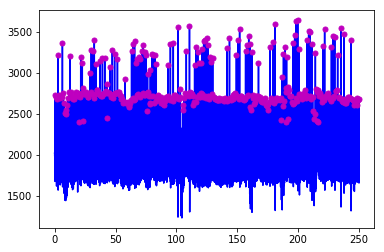

In [17]:
fig = plt.figure()
ax  = fig.add_subplot(111)

plt.plot(time_ECG,data_ECG2, linestyle='-', color='b')
plt.plot(peak_locations/200,peak_values, linestyle='', marker='o', color='m',markersize=5)

Whilst the signal has been properly displayed, the plot is not the neatest or best to visualise the ECG. So now we will introduce **Bokeh** (https://docs.bokeh.org/) which is

*"an interactive visualization library for modern web browsers. It provides elegant, concise construction of versatile graphics, and affords high-performance interactivity over large or streaming datasets. Bokeh can help anyone who would like to quickly and easily make interactive plots, dashboards, and data applications."* 

Bokeh has numerous tools that can be used in plots, but even without those, the display of bokeh is nicer than matplotlib (at least in my opinion).


We need to import several tools from Bokeh, and then we have the choice of creating an *html* display or embed into the notebook. We create a figure and then add the display on that figure, for instance, we will add lines for the ECG and circles for the peaks:

In [19]:
from bokeh.plotting import figure, output_file, show, output_notebook
#output to static HTML file
output_file("ECG.html")
output_notebook()
# create a new plot with a title and axis labels
TOOLS = "hover,crosshair,pan,wheel_zoom,box_zoom,box_select,lasso_select,reset,save"


p = figure(title="Display ECG with Bokeh",
            tools=TOOLS,
            x_axis_label='time (seconds)', y_axis_label='Electrical Activity')
# add a line renderer with legend and line thickness
p.line(time_ECG,data_ECG2, legend_label="ECG", line_width=1)
p.circle(peak_locations/200,peak_values, legend_label="peaks", fill_color="white", size=4,line_color="red")
# show the results
show(p)

Loading BokehJS ...

Loading BokehJS ...

If you cannot visualise the graph, you can see it here:

http://www.staff.city.ac.uk/~sbbk034/images/ECG.html

Compare this graph with the previous. The lines are thinner and even at the resolution provided it is possible to appreciate the whole signal. But what makes this much nicer is the interactive tools. 

First, there is the **crosshair** which allows you to move the cursor over the graph and see exactly where the mouse is located. This is linked with the **hover**, which returns the values of the plot. For our ECG analysis, the important ones are *data(x,y)* which indicate the values of x = time in seconds, and y = electrical activity (this should be properly callibrated but it is beyond the scope of this notebook). Above *data* is *index*, which corresponds to the location of those values in the array.


**zoom** and **pan** are very handy to zoom into a particular region of the ECG and move from one side to another. **Reset** returns to the original graph. Not yet used but shown in here are the **select** tools, with **box** or **lasso** options.

Now, to appreciate the importance of these visualisation tools, let's continue with the analysis of the heart rate. 

In [5]:
# calculate heart rate
dist_peaks =  (peak_locations[1:len(peak_locations)] - peak_locations[0:len(peak_locations)-1])
heart_rate = 60* dist_peaks/200

time_rate  =  time_ECG[peak_locations[0:len(peak_locations)-1]]

With the heart rate we can now display the ECG and the heart rate on the same figure, one above the other. We will link the horizontal ranges of both plots so that when you, pan, zoom in or out in one of the graphs, the other one also updates to the same command.

In [6]:
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.models import Range1d

output_file("ECG_HeartRate.html")
# create a new plots
s211 = figure(width=600, plot_height=200, title=None)
s212 = figure(width=600, plot_height=200, title=None)
#s211 = figure(width=600, plot_height=200, title=None, x_range=s211.x_range, y_range=s211.y_range)
#s212 = figure(width=600, plot_height=200, title=None, x_range=s211.x_range)

# add lines
s211.line(time_ECG,data_ECG2, legend_label="ECG", line_width=1)
s211.circle(peak_locations/200,peak_values, legend_label="peaks", fill_color="white", size=4,line_color="red")

s212.line(time_rate,heart_rate, legend_label="H.R.", line_width=2, color='magenta')
s211.x_range=Range1d(70,85)
s212.x_range = s211.x_range

p2 = gridplot([[s211],[ s212]], toolbar_location="right")

show(p2)

Again, if you cannot visualise the graph, you can see it here:

http://www.staff.city.ac.uk/~sbbk034/images/ECG_HeartRate.html

With these two graphs we can analyse the ECG, and the heart rate calculated from it with more detail. If you move the graph to show the region between seconds 75 and 80 you will notice that there are some false peaks that do not match with the peak of the QRS complex. These peaks should not be used as the heart rate drops below 20 beats per minute. We can remove them by increasing the distance between peaks from 10 to 50.

In [7]:
peak_locations,_ = signal.find_peaks(data_ECG2,height=2400,distance=50)
peak_values      = data_ECG2[peak_locations]
# calculate heart rate
dist_peaks =  (peak_locations[1:len(peak_locations)] - peak_locations[0:len(peak_locations)-1])
heart_rate2 = 60* dist_peaks/200

time_rate2  =  time_ECG[peak_locations[0:len(peak_locations)-1]]


Let's display again in a separate file:

In [8]:
output_file("ECG_HeartRate2.html")


# create a new plots
s211 = figure(width=600, plot_height=200, title=None)
s212 = figure(width=600, plot_height=200, title=None)

# add lines
s211.line(time_ECG,data_ECG2, legend_label="ECG", line_width=1)
s211.circle(peak_locations/200,peak_values, legend_label="peaks", fill_color="white", size=4,line_color="red")

s212.line(time_rate2,heart_rate2, legend_label="H.R.", line_width=2, color='magenta')
s211.x_range=Range1d(70,85)
s212.x_range = s211.x_range
p = gridplot([[s211],[ s212]], toolbar_location="right")
show(p)

Again, if you cannot visualise the graph, you can see it here:

http://www.staff.city.ac.uk/~sbbk034/images/ECG_HeartRate2.html

We have removed those spurious peaks. Now, let's pan the ECG to the region between 100 and 105 seconds where we had previously detected an artifact as the heart rate jumped to more than 100. 

In [9]:
s211.x_range=Range1d(95,110)
s212.x_range = s211.x_range
show(p)

This artifact is due to a sudden drop of the baseline of the signal and thus two heart beats are not detected as the intensity is below 2400. We can zoom in and see that the peaks are just below 2200. However, if we just lower the threshold, we will include a large number of peaks that do not correspond to the QRS complex. To avoid detecting those *low* peaks, we can use another parameter of the peak detection, the **prominence** that corresponds to the height of the peak against its neighbours. A quick observation of peaks show them above 2500 whilst the baseline is around 2000. So we can set the prominence level at 600 and visualise again. 

In [10]:
peak_locations,_  = signal.find_peaks(data_ECG2,height=2180,distance=50,prominence=600)
peak_values      = data_ECG2[peak_locations]
# calculate heart rate
dist_peaks =  (peak_locations[1:len(peak_locations)] - peak_locations[0:len(peak_locations)-1])
heart_rate3 = 60* dist_peaks/200
time_rate3  =  time_ECG[peak_locations[0:len(peak_locations)-1]]

In [13]:
output_file("ECG_HeartRate3.html")


# create a new plots
s211 = figure(width=600, plot_height=200, title=None, x_range=s211.x_range, y_range=s211.y_range,)
s212 = figure(width=600, plot_height=200, title=None, x_range=s211.x_range)

# add lines
s211.line(time_ECG,data_ECG2, legend_label="ECG", line_width=1)
s211.circle(peak_locations/200,peak_values, legend_label="peaks", fill_color="white", size=4,line_color="red")

s212.line(time_rate3,heart_rate3, legend_label="H.R.", line_width=2, color='magenta')
s212.circle(time_rate3,heart_rate3,   fill_color="white", size=4, color='magenta')
s212.line(time_rate,heart_rate, line_width=0.5, color='black')


p = gridplot([[s211],[ s212]], toolbar_location="right")
#s211.x_range=Range1d(50,70)
#s212.x_range=Range1d(50,70)
show(p)

With this final adjustment, we were able to detect those peaks where the baseline was below the previous threshold and those regions where the heart rate is higher or lower than 38, which seems to be the correct rate, it is due to ECG beats that do not look very regular, i.e. the one between 100 and 102.

Finally, let's zoom out and visualise the whole ECG signal 

In [14]:
s211.x_range =Range1d(0,200)
s212.x_range = s211.x_range
s212.y_range = Range1d(0,100)
show(p)

Again, if you cannot visualise the graph, you can see it here:

http://www.staff.city.ac.uk/~sbbk034/images/ECG_HeartRate3.html

We can see that the artifacts that lead to the incorrect calculations of the heart rate have been removed and now the heart rate is more stable around 38 b.p.m. The heart rate is not completely stable, but now the variations are linked to actual variations on the pulses and not due to artifacts in the calculations.